Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

Data Collection

In [2]:
# Load the data from .csv file to pandas dataframe
data = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/Titanic.csv')

In [3]:
# Printing the first five rows of the dataframe
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [4]:
# Number of rows and columns in our dataset
data.shape

(1309, 14)

In [5]:
# Information about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [6]:
# Number of missing values in each column
data.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

Handling the Missing Values

In [7]:
# Dropping the 'cabin', 'boat', 'body' and 'home.dest' columns from the dataframe
data = data.drop(columns = ['cabin', 'boat', 'body', 'home.dest'], axis = 1)

In [8]:
# Replacing the missing values in 'age' column with the mean value
data['age'].fillna(data['age'].mean(), inplace = True)

In [9]:
# Replacing the missing values in 'embarked' column with the mode value
data['embarked'].fillna(data['embarked'].mode()[0], inplace = True)

In [10]:
# Replacing the missing values in 'fare' column with the mode value
data['fare'].fillna(data['fare'].mode()[0], inplace = True)

In [11]:
# Again checking the number of missing values in each column
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

Data Visualization

In [12]:
sns.set()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


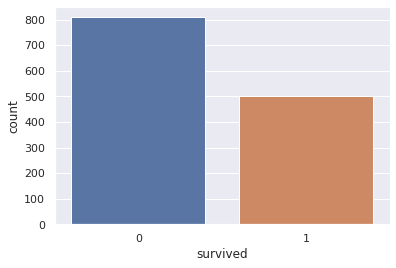

In [13]:
# count plot for 'survived' column
sns.countplot('survived', data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


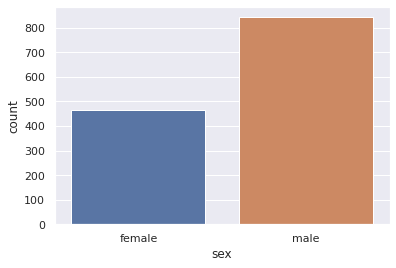

In [14]:
# count plot for 'sex' column
sns.countplot('sex', data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


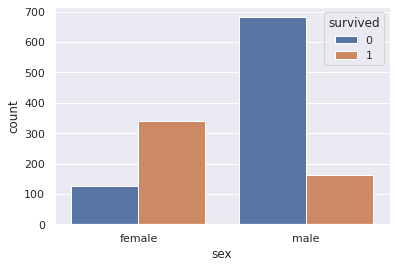

In [15]:
# count plot for 'survived' column gender-wise
sns.countplot('sex', hue = 'survived', data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


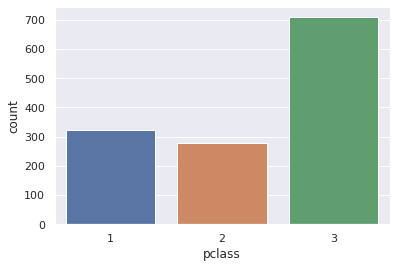

In [16]:
# count plot for 'pclass' column
sns.countplot('pclass', data = data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


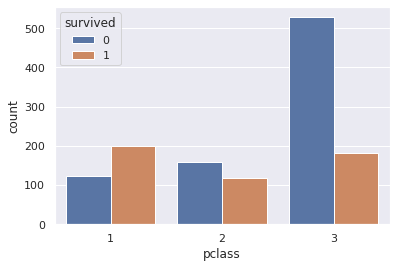

In [17]:
# count plot for 'survived' column class-wise
sns.countplot('pclass', hue = 'survived', data = data)

Data Encoding

In [18]:
data['sex'].value_counts()

male      843
female    466
Name: sex, dtype: int64

In [19]:
data['embarked'].value_counts()

S    916
C    270
Q    123
Name: embarked, dtype: int64

In [20]:
# Conversion to categorical columns
data.replace({'sex' : {'male' : 0, 'female' : 1}, 'embarked' : {'S' : 0, 'C' : 1, 'Q' : 2}}, inplace = True)

In [21]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",1,29.00,0,0,24160,211.3375,0
1,1,1,"Allison, Master. Hudson Trevor",0,0.92,1,2,113781,151.5500,0
2,1,0,"Allison, Miss. Helen Loraine",1,2.00,1,2,113781,151.5500,0
3,1,0,"Allison, Mr. Hudson Joshua Creighton",0,30.00,1,2,113781,151.5500,0
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,25.00,1,2,113781,151.5500,0


Data Analysis

In [22]:
# Getting statistical data about the dataset
data.describe()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,2.294882,0.381971,0.355997,29.881138,0.498854,0.385027,33.276193,0.394194
std,0.837836,0.486055,0.478997,12.883193,1.041658,0.865560,51.743584,0.653499
min,1.000000,0.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,0.000000,29.881138,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,1.000000,1.000000,80.000000,8.000000,9.000000,512.329200,2.000000


In [23]:
# Getting co-relation data about the dataset
data.corr()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
pclass,1.000000,-0.312469,-0.124617,-0.366371,0.060832,0.018322,-0.558740,0.038875
survived,-0.312469,1.000000,0.528693,-0.050198,-0.027825,0.082660,0.244479,0.098450
sex,-0.124617,0.528693,1.000000,-0.057397,0.109609,0.213125,0.185744,0.120423
age,-0.366371,-0.050198,-0.057397,1.000000,-0.190747,-0.130872,0.170619,0.035824
sibsp,0.060832,-0.027825,0.109609,-0.190747,1.000000,0.373587,0.160388,-0.073461
parch,0.018322,0.082660,0.213125,-0.130872,0.373587,1.000000,0.221668,-0.095523
fare,-0.558740,0.244479,0.185744,0.170619,0.160388,0.221668,1.000000,0.061337
embarked,0.038875,0.098450,0.120423,0.035824,-0.073461,-0.095523,0.061337,1.000000


Separating Features and Target variable

In [24]:
X = data.drop(columns = ['name', 'ticket', 'survived'], axis = 1)
y = data['survived']

In [25]:
X

,pclass,sex,age,sibsp,parch,fare,embarked
0,1,1,29.000000,0,0,211.3375,0
1,1,0,0.920000,1,2,151.5500,0
2,1,1,2.000000,1,2,151.5500,0
3,1,0,30.000000,1,2,151.5500,0
4,1,1,25.000000,1,2,151.5500,0
...,...,...,...,...,...,...,...
1304,3,1,14.500000,1,0,14.4542,1
1305,3,1,29.881138,1,0,14.4542,1
1306,3,0,26.500000,0,0,7.2250,1
1307,3,0,27.000000,0,0,7.2250,1


In [26]:
y

0       1
1       1
2       0
3       0
4       0
       ..
1304    0
1305    0
1306    0
1307    0
1308    0
Name: survived, Length: 1309, dtype: int64

In [27]:
X.shape, y.shape

((1309, 7), (1309,))

Splitting the data into Training data and Testing data

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 2529)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((916, 7), (393, 7), (916,), (393,))

Training Model

In [30]:
model = LogisticRegression(max_iter = 500)

In [31]:
# Training our model
model.fit(X_train, y_train)

LogisticRegression(max_iter=500)

Model Evaluation

In [32]:
# Using our model to predict the values for X_test dataframe
y_predict = model.predict(X_test)

In [33]:
y_predict

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [34]:
confusion_matrix(y_test, y_predict)

array([[228,  26],
       [ 40,  99]])

In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       254
           1       0.79      0.71      0.75       139

    accuracy                           0.83       393
   macro avg       0.82      0.80      0.81       393
weighted avg       0.83      0.83      0.83       393



In [36]:
accuracy_score(y_test, y_predict)

0.8320610687022901